## ***DS5220_HW01***

In [1]:
### Import Library 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn import metrics

from google.colab import drive
drive.mount("/content/drive")

# Import Data set
data = pd.read_csv("/content/drive/MyDrive/DS5220_Supervised Machine Learning/Assignments/HW01/housing.csv")

Mounted at /content/drive


### ***Problme01***

Intercept: 0.48571428571428577 Coef: [ 8.77708367e-18 -1.42857143e-01]
Prediction of y: [-0.08571429  0.34285714  0.48571429  0.34285714 -0.08571429]


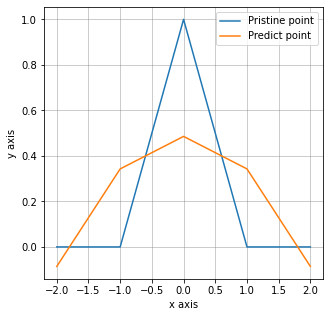

In [ ]:
'''
Get the quadratic equation that most fits in [-2,0], [-1,0], [0,1], [1,0], [2,0]
Adapt Polynomial Features and fit the Linear Regression 
'''
data = np.array([[-2,0], [-1,0], [0,1], [1,0], [2,0]])
data = pd.DataFrame(data)
X = data[0]
y = data[1]
X = np.array(X)
y = np.array(y)

"""Adapt polynomial features"""
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X.reshape(-1, 1))
X_poly 

"""
Fit the X, y, and get the intercept and coef
Therefore, y = 8.77708367e-18x^2 + -1.42857143e-01x + 0.48571428571428577
"""
reg = LinearRegression()
reg.fit(X_poly, y)
y_pred = reg.predict(X_poly)
y_pred
print("Intercept:", reg.intercept_,"Coef:", reg.coef_)
print("Prediction of y:", y_pred)

"""Plot""" 
plt.figure(figsize=(5,5))
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.grid(color="gray", alpha=0.5, linestyle="-")

plt.plot(X, y, label="Pristine point")
plt.plot(X, y_pred, label="Predict point")
plt.legend()
plt.show()

### ***Problem03***

(20640, 10)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c658d0d00>,
      dtype=object)

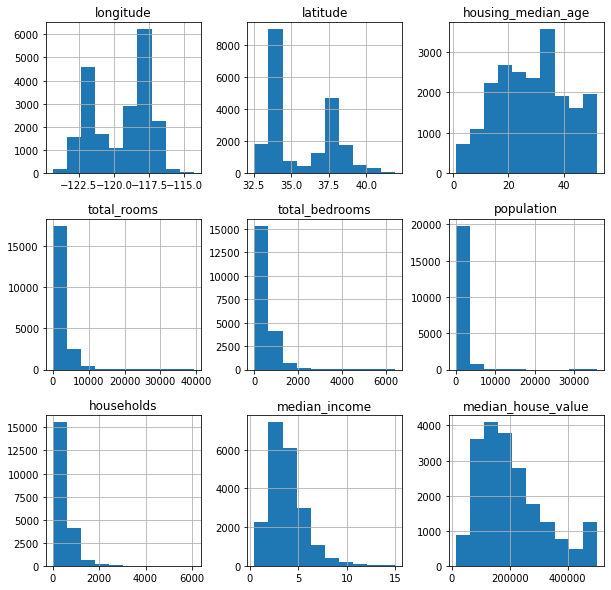

In [2]:
"""
California House Prices Prediction
Import the data from My Google Drive
"""
data = pd.DataFrame(data)

# 01
"""
Display the data set and display summary statistics of the data 
The longtitude and latitude column have the common std, and on the whole, the statistical
valeus are quiet similar. Therefore, We can find something like the corellations between two columns after.
And we could check the outliers in some columns through the mean, std, min, 25%, 75%, and max values.
To get the existence of outliers, visualize the data and we can check the some outliers in total_rooms,
total_bedrooms, and population. 
"""
print(data.shape)
data.describe()

data.hist(figsize=(10,10))

In [17]:
# Statistic 
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [18]:
### 02
"""
Compute the correlation between each feature and the target 
For result, we can see the X of median_income has the strongest correlation between the target
"""
# Split data
data.head()
y = data["median_house_value"]
X = data.drop(["median_house_value"], axis=1)
Bf_X = X

### Get Column Name
column_names = []
for col in X.columns:
  column_names.append(col)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


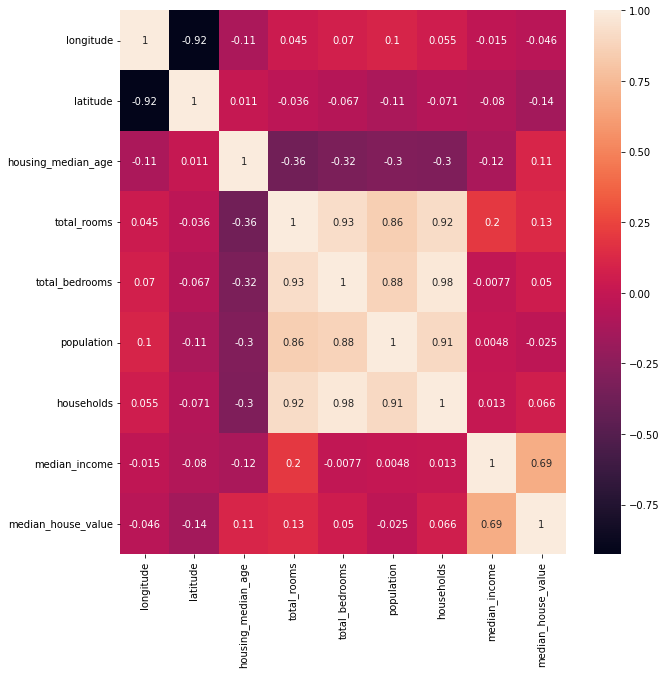

In [19]:
### Calculate Corr 
corr_matrix = data.corr() 
print(corr_matrix["median_house_value"].sort_values(ascending=False))

### Heatmap of Correlation X
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)

In [20]:
### 03
"""
Take actions in order to prepare the data set for the learning algorithm
1. Check Null value (Replace)
2. Check the existence of categorical value (One-hot Encoing) Or Discretization
3. Feature Scaling (Normalization)
4. Feature extraction (Extract the low variance and )
"""

'\nTake actions in order to prepare the data set for the learning algorithm\n1. Check Null value (Replace)\n2. Check the existence of categorical value (One-hot Encoing) Or Discretization\n3. Feature Scaling (Normalization)\n4. Feature extraction (Extract the low variance and )\n'

In [21]:
### 04
### Data Cleaning
"""Before the Data"""
data.head()

# Null
"""
Claening Data set
1. Replace the Null value 
Check the sum of Null 
Found Null value in total_bedroom replace to mean value
"""
X.isnull().sum()
total_bedrooms_mean_value = X["total_bedrooms"].mean()
X["total_bedrooms"].replace(np.nan, total_bedrooms_mean_value, inplace=True)

# Categorical Value
"""
Check the Categorical values 
In the columns, the ocean_proximity is the categorical value 
So, use One-Hot Encoding to make continuous variables
There are 4 types of values INLAND, NEAR OCEAN, NEAR BAY, ISLAND  
"""
ocean_data = X["ocean_proximity"]
ocean_data = pd.get_dummies(ocean_data)
ocean_data.head()

X.drop(["ocean_proximity"], axis=1, inplace=True)
X = pd.concat([X, ocean_data], axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


<ipython-input-22-0b1ecc827ab5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skewed_features[i+"_log"] = np.log1p(skewed_features[i])
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05d94ce2b0>,
      dtype=object)

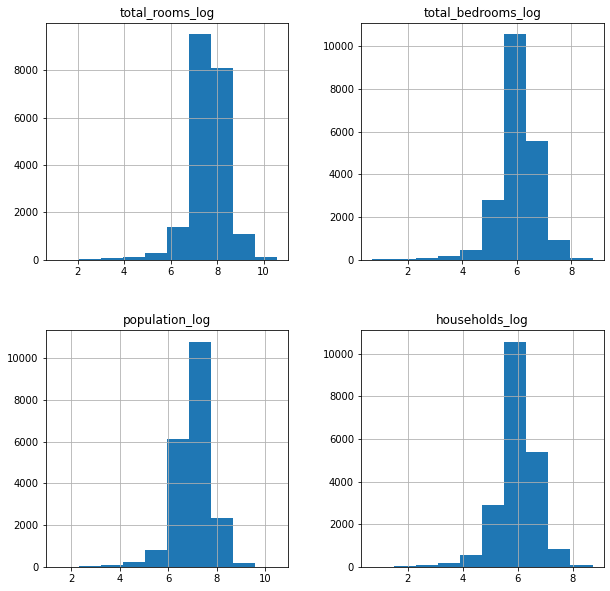

In [22]:
### Feature Scailing
# Log
"""
Look at the feature distributions, some features are skewed and not normal. 
Because some values are concentrated to one side. Therefore, using the log would be helpful
"""
log_data = X
skewed_features = log_data[["total_rooms", "total_bedrooms", "population", "households"]]
for i in skewed_features:
  skewed_features[i+"_log"] = np.log1p(skewed_features[i])

# Concat
"""Drop the pristine features and concat the log features"""
skewed_features.drop(["total_rooms", "total_bedrooms", "population", "households"], axis=1, inplace=True)
X.drop(["total_rooms", "total_bedrooms", "population", "households"], axis=1, inplace=True)
X = pd.concat([X, skewed_features], axis=1)
skewed_features.hist(figsize=(10,10))

In [23]:
### Feature Scailing
# Standarlization
"""To run linear Regression model, standarlize the data"""
scaler = StandardScaler() 
numerical_features = ["longitude","latitude","housing_median_age","median_income","total_rooms_log","total_bedrooms_log","population_log","households_log"]
Std_data = X[numerical_features]
Std_data = scaler.fit_transform(Std_data)
Std_data = pd.DataFrame(Std_data, columns=numerical_features)
Std_data.head()

# Concat
X.drop(["longitude","latitude","housing_median_age","median_income","total_rooms_log","total_bedrooms_log","population_log","households_log"], axis=1, inplace=True)
X = pd.concat([X, Std_data], axis=1)

In [24]:
### Feature Extraction 
"""Compute the lowest variance feature"""
vt = VarianceThreshold(threshold=0.05) 
vt.fit(X)

pd.DataFrame({"Variance": vt.variances_, 
             "Select_feature": vt.get_support()},
             index=X.columns).T

# Extract Feature
"""It seems that Island feature has the lowest variance"""
X.drop(["ISLAND"],axis=1, inplace=True)

In [25]:
### Show Clean data set Before & After
Bf_X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [26]:
X

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,median_income,total_rooms_log,total_bedrooms_log,population_log,households_log
0,0,0,1,0,-1.327835,1.052548,0.982143,2.344766,-1.131133,-1.644278,-1.694943,-1.569395
1,0,0,1,0,-1.322844,1.043185,-0.607019,2.332238,1.651357,1.316422,1.030337,1.449251
2,0,0,1,0,-1.332827,1.038503,1.856182,1.782699,-0.450310,-1.112456,-1.109604,-1.104849
3,0,0,1,0,-1.337818,1.038503,1.856182,0.932968,-0.638257,-0.820020,-0.949925,-0.813343
4,0,0,1,0,-1.337818,1.038503,1.856182,-0.012881,-0.312370,-0.578778,-0.933021,-0.583469
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0,1,0,0,-0.758826,1.801647,-0.289187,-1.216128,-0.281605,-0.179887,-0.387090,-0.251243
20636,0,1,0,0,-0.818722,1.806329,-0.845393,-0.691593,-1.441596,-1.437286,-1.559000,-1.705974
20637,0,1,0,0,-0.823713,1.778237,-0.924851,-1.142593,0.122042,0.178517,-0.149112,0.121563
20638,0,1,0,0,-0.873626,1.778237,-0.845393,-1.054583,-0.134015,-0.056544,-0.565257,-0.174439


In [27]:
### 05
"""
Extract at least two new features based on data set
Let's extract two features which related with total_rooms and bedrooms 
It seems that we can more specify and improve feature correlations through devide rooms per population
"""
col_names = ["room/person", "bed/person"]
new_feature_totalroom = data["total_rooms"] / data["population"]
new_feature_bedroom = data["total_bedrooms"] / data["population"]
new_features = pd.concat([new_feature_totalroom, new_feature_bedroom], axis=1)
new_features.rename(columns={0:"room/person", 1:"bed/person"}, inplace=True)
new_features

,room/person,bed/person
0,2.732919,0.400621
1,2.956685,0.460641
2,2.957661,0.383065
3,2.283154,0.421147
4,2.879646,0.495575
...,...,...
20635,1.970414,0.442604
20636,1.957865,0.421348
20637,2.238332,0.481629
20638,2.510121,0.551957


In [28]:
### 06
"""
Run Linear Regression model 
The Ratio of Train / Test is 80% and 20% 
"""
data = pd.concat([X, y], axis=1)
Train_data, Test_data = train_test_split(data, shuffle=True, test_size=0.2, random_state=22)
print(Train_data.shape)
print(Test_data.shape)

# Split Train, Test 
X_train = Train_data.drop(["median_house_value"], axis=1)
y_train = Train_data["median_house_value"]

X_test = Test_data.drop(["median_house_value"], axis=1)
y_test = Test_data["median_house_value"]

# Transform y data as Log
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

(16512, 13)
(4128, 13)


In [29]:
### Linear Regression 
lr = LinearRegression()
lr.fit(X_train, y_train)

# coef, intercept
print("coef:", lr.coef_)
print("intercept:", lr.intercept_)

coef: [-0.48907561 -0.78238522 -0.53937067 -0.55061773 -0.35663884 -0.37947316
  0.02473364  0.3118362  -0.01408308  0.13362502 -0.3187939   0.22463425]
intercept: 12.680284159814455


In [30]:
### Evaluation 
"""Calculate y_pred and get RMSE and R2"""
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# RMSE
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse) 
test_rmse = np.sqrt(test_mse) 

# R-squared
train_r2 = metrics.r2_score(y_train, y_train_pred) 
test_r2 = metrics.r2_score(y_test, y_test_pred) 

print("Train RMSE:",train_rmse)
print("Train R2:",train_r2)
print("\n")
print("Test RMSE:",test_rmse)
print("Test R2:",test_r2)

Train RMSE: 0.3212389675688527
Train R2: 0.6826625533587412


Test RMSE: 0.3197870791948244
Test R2: 0.6791380345346982


In [31]:
### 07
"""
Adding regularization to improve the accuracy of Linear model
The L2(Ridge) regularization will be used, and will use Grid Search to find λ 
"""
# Alpha list
alpha = []
i, grid_value = 0, 0.00001
while grid_value<=1:
  alpha.append(grid_value)
  grid_value *= 10

# Ridge model
model = Ridge()
parameters = {"alpha":alpha}
Ridge_reg = GridSearchCV(model, parameters, scoring="neg_mean_squared_error",cv=5)
Ridge_reg.fit(X_train, y_train) 
print(Ridge_reg.best_estimator_) 

# Best Model Fitting
best_model = Ridge_reg.best_estimator_ 
best_model.fit(X_train, y_train)
y_best_pred = best_model.predict(X_test) 

# Accuracy 
mse = metrics.mean_squared_error(y_test, y_best_pred) 
rmse = np.sqrt(mse)
print("RMSE:", rmse) 

r2 = metrics.r2_score(y_test, y_best_pred) 
print("R2:",r2) 

Ridge(alpha=0.01)
RMSE: 0.31978712052953295
R2: 0.6791379515874028


In [32]:
### 08
"""
Replace Linear Regression model to Decision Tree Regression model 
Get the result of RMSE and R2 in train & test set
"""
dec_reg =  DecisionTreeRegressor(random_state=22) 
dec_reg.fit(X_train, y_train) 

# Evaluation
y_train_pred = dec_reg.predict(X_train) 
y_test_pred = dec_reg.predict(X_test) 
train_mse = metrics.mean_squared_error(y_train, y_train_pred) 
train_rmse = np.sqrt(train_mse)
test_mse = metrics.mean_squared_error(y_test, y_test_pred) 
test_rmse = np.sqrt(test_mse)

# R2 
train_r2 = metrics.r2_score(y_train, y_train_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred) 

# Result
print("Train RMSE:", train_rmse)
print("Train R2:", train_r2)
print("\n")
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)

Train RMSE: 1.2313356984325505e-15
Train R2: 1.0


Test RMSE: 0.32207986992417503
Test R2: 0.6745205457905064


In [6]:
### 08-2
"""Use Pristine data set for regression"""
### Decision Tree 
X_tree = data
y_tree = data["median_house_value"]
X_tree = X_tree.drop(["median_house_value"], axis=1)

# Null
X_tree.isnull().sum()
total_bedrooms_mean_value = X_tree["total_bedrooms"].mean()
X_tree["total_bedrooms"].replace(np.nan, total_bedrooms_mean_value, inplace=True)

# Categorical Value
ocean_data = X_tree["ocean_proximity"]
ocean_data = pd.get_dummies(ocean_data)
ocean_data.head()

X_tree.drop(["ocean_proximity"], axis=1, inplace=True)
X_tree = pd.concat([X_tree, ocean_data], axis=1)
X_tree.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [7]:
# Split
data_tree = pd.concat([X_tree, y_tree], axis=1)
Train_data, Test_data = train_test_split(data_tree, shuffle=True, test_size=0.2, random_state=22)
print(Train_data.shape)
print(Test_data.shape)

(16512, 14)
(4128, 14)


In [8]:
# Split Train, Test 
X_train_tree = Train_data.drop(["median_house_value"], axis=1)
y_train_tree = Train_data["median_house_value"]

X_test_tree = Test_data.drop(["median_house_value"], axis=1)
y_test_tree = Test_data["median_house_value"]

In [10]:
# Model
dec_reg =  DecisionTreeRegressor(random_state=22) 
dec_reg.fit(X_train_tree, y_train_tree) 

# Evaluation
y_train_pred_tree = dec_reg.predict(X_train_tree) 
y_test_pred_tree = dec_reg.predict(X_test_tree) 
train_mse = metrics.mean_squared_error(y_train_tree, y_train_pred_tree) 
train_rmse = np.sqrt(train_mse)
test_mse = metrics.mean_squared_error(y_test_tree, y_test_pred_tree) 
test_rmse = np.sqrt(test_mse)

# R2 
train_r2 = metrics.r2_score(y_train_tree, y_train_pred_tree)
test_r2 = metrics.r2_score(y_test_tree, y_test_pred_tree) 

# Result
print("Train RMSE:", train_rmse)
print("Train R2:", train_r2)
print("\n")
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)

Train RMSE: 0.0
Train R2: 1.0


Test RMSE: 68896.25638442393
Test R2: 0.6347163298775892
